In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,9c350343-e895-49df-af90-d50b91d19d3e,0,24.902800,6.655820e-05,0.810725,0.001305,2.511150,0.029861,71.7441,neutral
1,9c350343-e895-49df-af90-d50b91d19d3e,1,0.105126,2.913510e-11,0.000546,0.004444,0.020332,0.000050,99.8695,neutral
2,9c350343-e895-49df-af90-d50b91d19d3e,2,0.032465,4.927800e-11,0.000134,0.326047,0.076447,0.000012,99.5649,neutral
3,9c350343-e895-49df-af90-d50b91d19d3e,3,0.006253,3.979720e-10,0.000096,0.073862,0.008517,0.002353,99.9089,neutral


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          4 non-null      object 
 1   image_seq         4 non-null      int64  
 2   angry             4 non-null      float64
 3   disgust           4 non-null      float64
 4   fear              4 non-null      float64
 5   happy             4 non-null      float64
 6   sad               4 non-null      float64
 7   surprise          4 non-null      float64
 8   neutral           4 non-null      float64
 9   dominant_emotion  4 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 452.0+ bytes


In [4]:
emotion_df

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,9c350343-e895-49df-af90-d50b91d19d3e,0,24.902800,6.655820e-05,0.810725,0.001305,2.511150,0.029861,71.7441,neutral
1,9c350343-e895-49df-af90-d50b91d19d3e,1,0.105126,2.913510e-11,0.000546,0.004444,0.020332,0.000050,99.8695,neutral
2,9c350343-e895-49df-af90-d50b91d19d3e,2,0.032465,4.927800e-11,0.000134,0.326047,0.076447,0.000012,99.5649,neutral
3,9c350343-e895-49df-af90-d50b91d19d3e,3,0.006253,3.979720e-10,0.000096,0.073862,0.008517,0.002353,99.9089,neutral


In [5]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust      fear     happy       sad  \
count   4.000000   4.000000  4.000000e+00  4.000000  4.000000  4.000000   
mean    1.500000   6.261661  1.663967e-05  0.202875  0.101414  0.654111   
std     1.290994  12.427496  3.327902e-05  0.405233  0.153454  1.238380   
min     0.000000   0.006253  2.913510e-11  0.000096  0.001305  0.008517   
25%     0.750000   0.025912  4.424227e-11  0.000125  0.003659  0.017378   
50%     1.500000   0.068795  2.236250e-10  0.000340  0.039153  0.048389   
75%     2.250000   6.304545  1.663985e-05  0.203090  0.136908  0.685123   
max     3.000000  24.902800  6.655820e-05  0.810725  0.326047  2.511150   

       surprise    neutral  
count  4.000000   4.000000  
mean   0.008069  92.771850  
std    0.014569  14.019343  
min    0.000012  71.744100  
25%    0.000040  92.609700  
50%    0.001201  99.717200  
75%    0.009230  99.879350  
max    0.029861  99.908900  


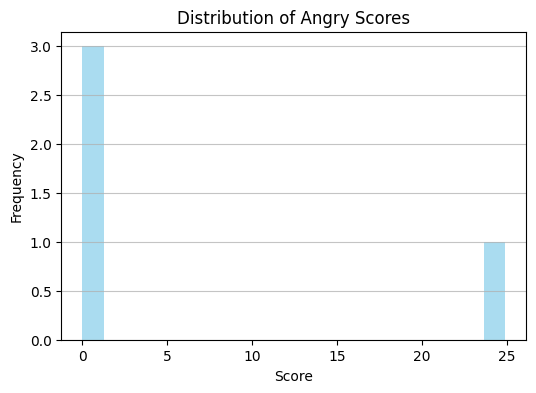

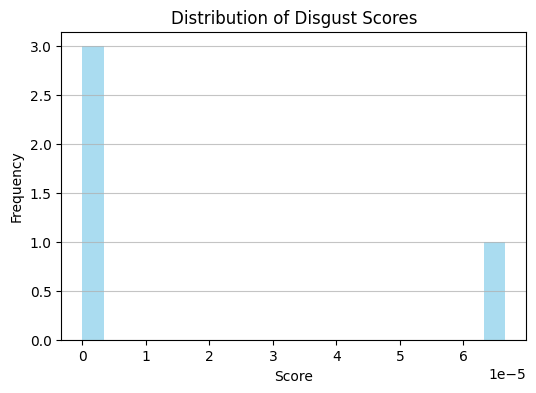

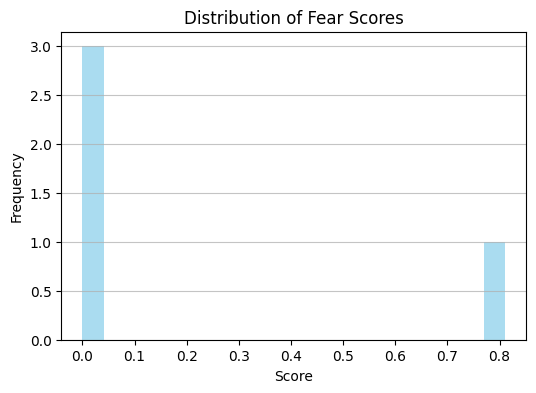

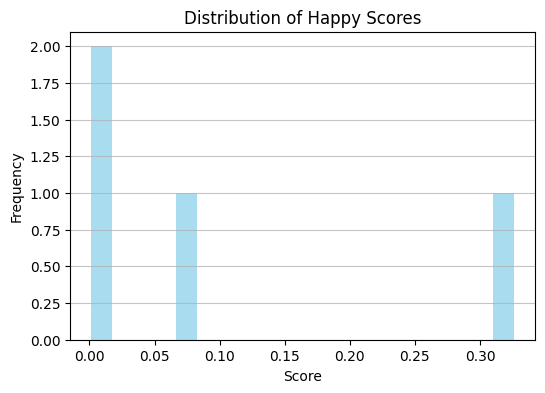

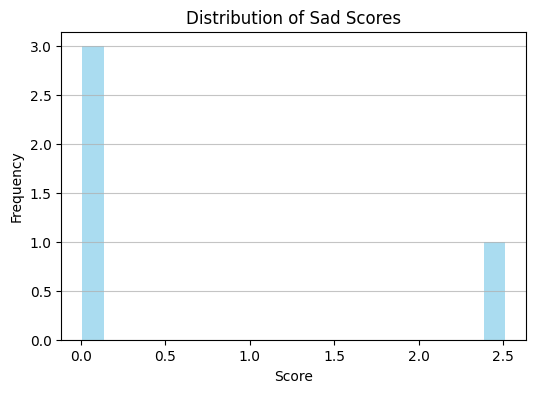

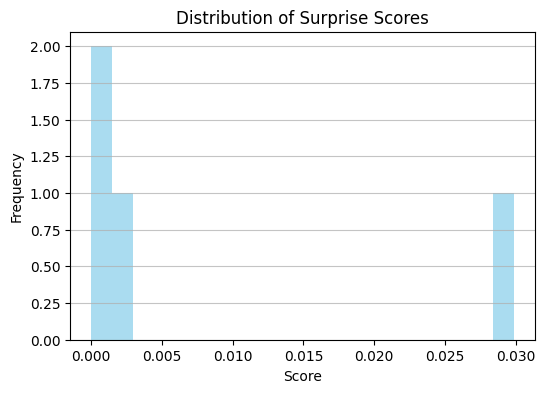

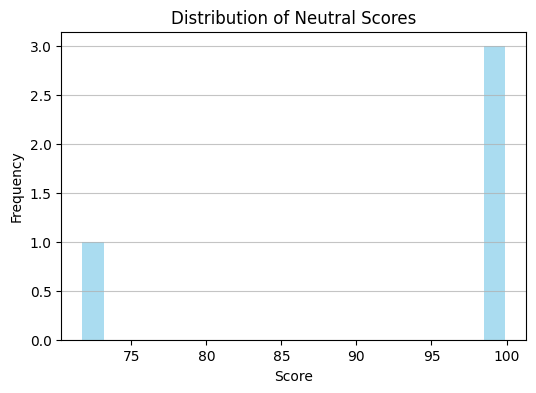

In [6]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

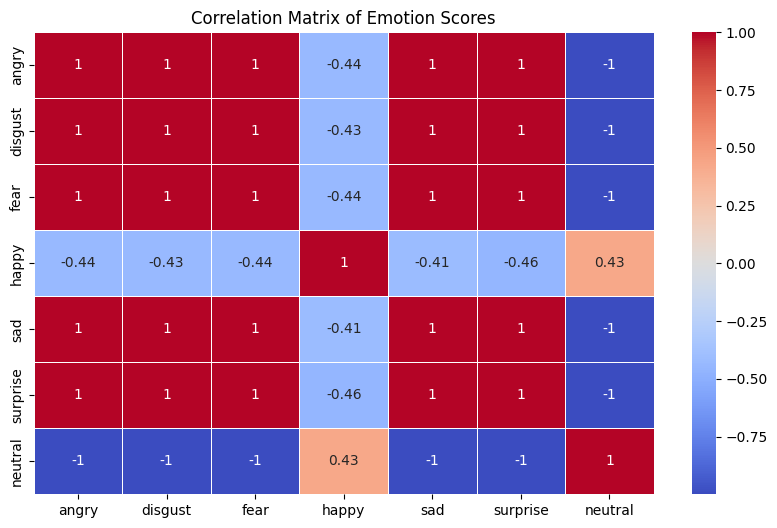

In [7]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

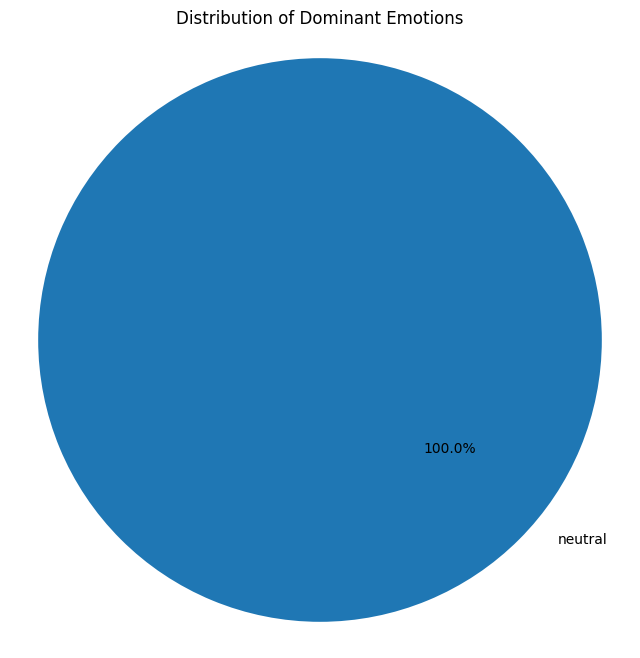

In [8]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [9]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,9c350343-e895-49df-af90-d50b91d19d3e,1,1,1,-16.9749
1,9c350343-e895-49df-af90-d50b91d19d3e,2,1,0,-22.6020
2,9c350343-e895-49df-af90-d50b91d19d3e,3,1,0,-15.2277
3,9c350343-e895-49df-af90-d50b91d19d3e,4,1,0,-8.4059


In [10]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

       gaze  blink  eye_offset
count   4.0   4.00    4.000000
mean    1.0   0.25  -15.802625
std     0.0   0.50    5.849439
min     1.0   0.00  -22.602000
25%     1.0   0.00  -18.381675
50%     1.0   0.00  -16.101300
75%     1.0   0.25  -13.522250
max     1.0   1.00   -8.405900


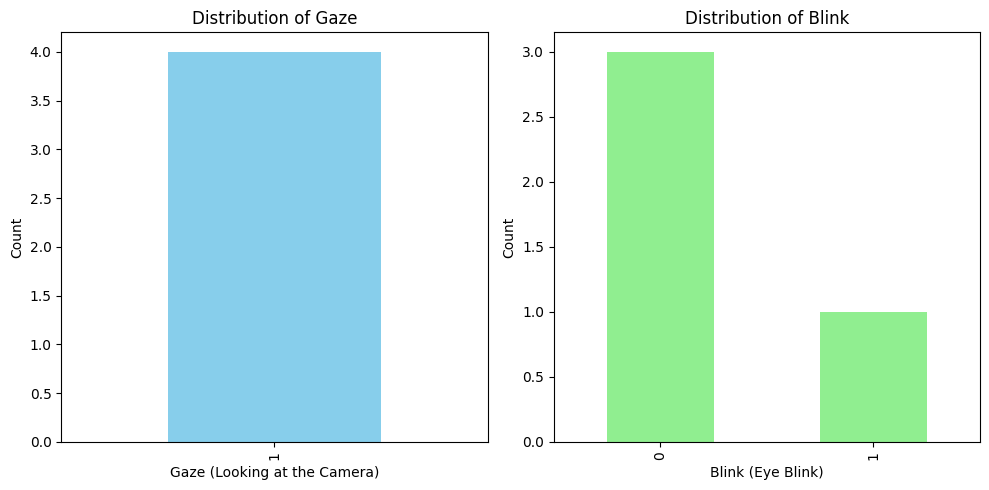

In [11]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

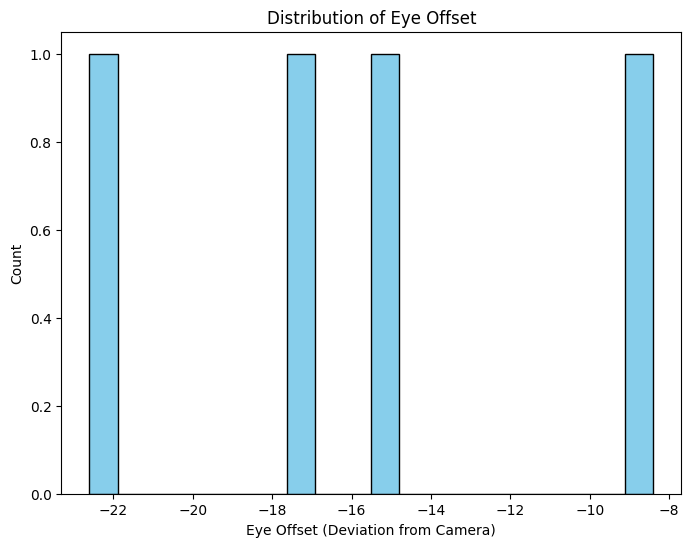

In [12]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [13]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,9c350343-e895-49df-af90-d50b91d19d3e,0,80985461-c5d6-466f-a30a-4de2784ed0a3,8.0,2023-09-17 07:57:04,0.0
1,9c350343-e895-49df-af90-d50b91d19d3e,1,80985461-c5d6-466f-a30a-4de2784ed0a3,13.0,2023-09-17 07:57:04,0.0
2,9c350343-e895-49df-af90-d50b91d19d3e,2,80985461-c5d6-466f-a30a-4de2784ed0a3,49.0,2023-09-17 07:57:04,0.0
3,9c350343-e895-49df-af90-d50b91d19d3e,3,80985461-c5d6-466f-a30a-4de2784ed0a3,72.0,2023-09-17 07:57:04,0.0


In [14]:
metadata_df.shape

(4, 6)

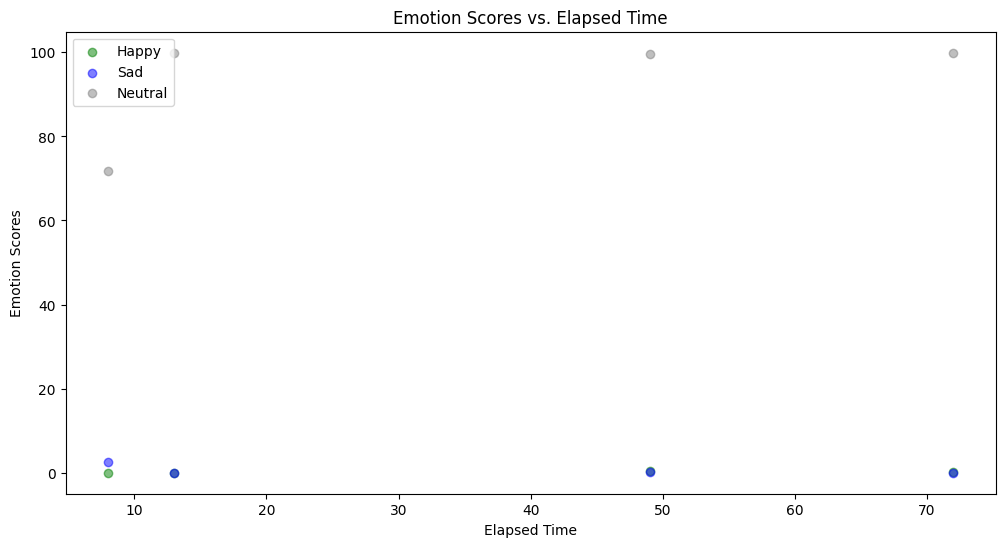

In [15]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [16]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

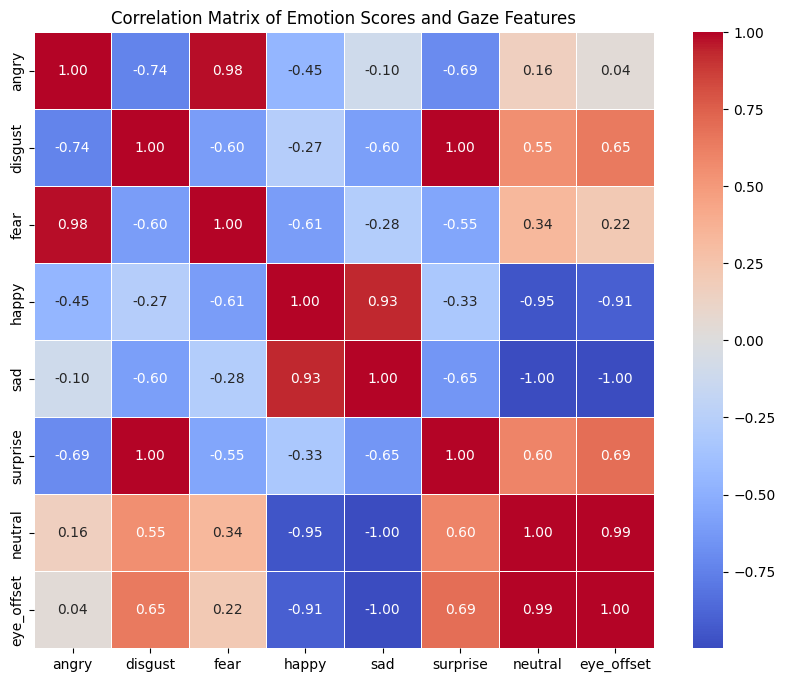

In [17]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [18]:
transcript_scores_df = pd.read_csv("5.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,4.84,"Hello, I'm Sakshi. I come from Mumbai. I did ...","[50364, 2425, 11, 286, 478, 18025, 46226, 13, ...",0.0,-0.275525,1.583333,0.169504,0.539392,0.143638,0.316970,0.897895,0.924957,0.740309,0.693109,2.892562
1,1,0,4.84,8.96,with specialization in advertising. I have co...,"[50606, 365, 2121, 2144, 294, 13097, 13, 286, ...",0.0,-0.275525,1.583333,0.169504,0.825680,0.104166,0.070154,0.732468,0.298984,0.556738,0.388407,1.941748
2,2,0,8.96,12.88,certification courses. One was entrepreneursh...,"[50812, 21775, 7712, 13, 1485, 390, 26582, 116...",0.0,-0.275525,1.583333,0.169504,0.685738,0.156997,0.157265,0.718465,0.414894,0.471627,0.421808,2.295918
3,3,0,12.88,16.88,second one was foundations of management by G...,"[51008, 1150, 472, 390, 22467, 295, 4592, 538,...",0.0,-0.275525,1.583333,0.169504,0.464676,0.354674,0.180650,0.133900,0.584103,0.340603,0.083330,3.500000
4,4,0,16.88,22.00,busy doing college group projects and assignm...,"[51208, 5856, 884, 3859, 1594, 4455, 293, 2254...",0.0,-0.275525,1.583333,0.169504,0.423742,0.276220,0.300038,0.837648,0.582610,0.352158,0.311778,2.343750


In [19]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.630573   0.187013   0.182414   0.590094   0.461488   0.413644   
std     0.196547   0.174789   0.080020   0.261988   0.253343   0.233565   
min     0.104820   0.011025   0.035960   0.065768   0.007717   0.046411   
25%     0.539392   0.100235   0.139609   0.417246   0.301754   0.297613   
50%     0.666163   0.143638   0.183636   0.650230   0.539980   0.344343   
75%     0.686997   0.267005   0.225224   0.737882   0.631814   0.471627   
max     0.950391   0.755571   0.316970   0.897895   0.924957   0.961038   

       enthusiastic  speech_speed  
count     17.000000     17.000000  
mean       0.378110      2.817341  
std        0.251527      0.705604  
min        0.011409      1.857143  
25%        0.187111      2.272727  
50%        0.412160      2.777778  
75%        0.464803      3.197674  
max        0.903439      4.225352  


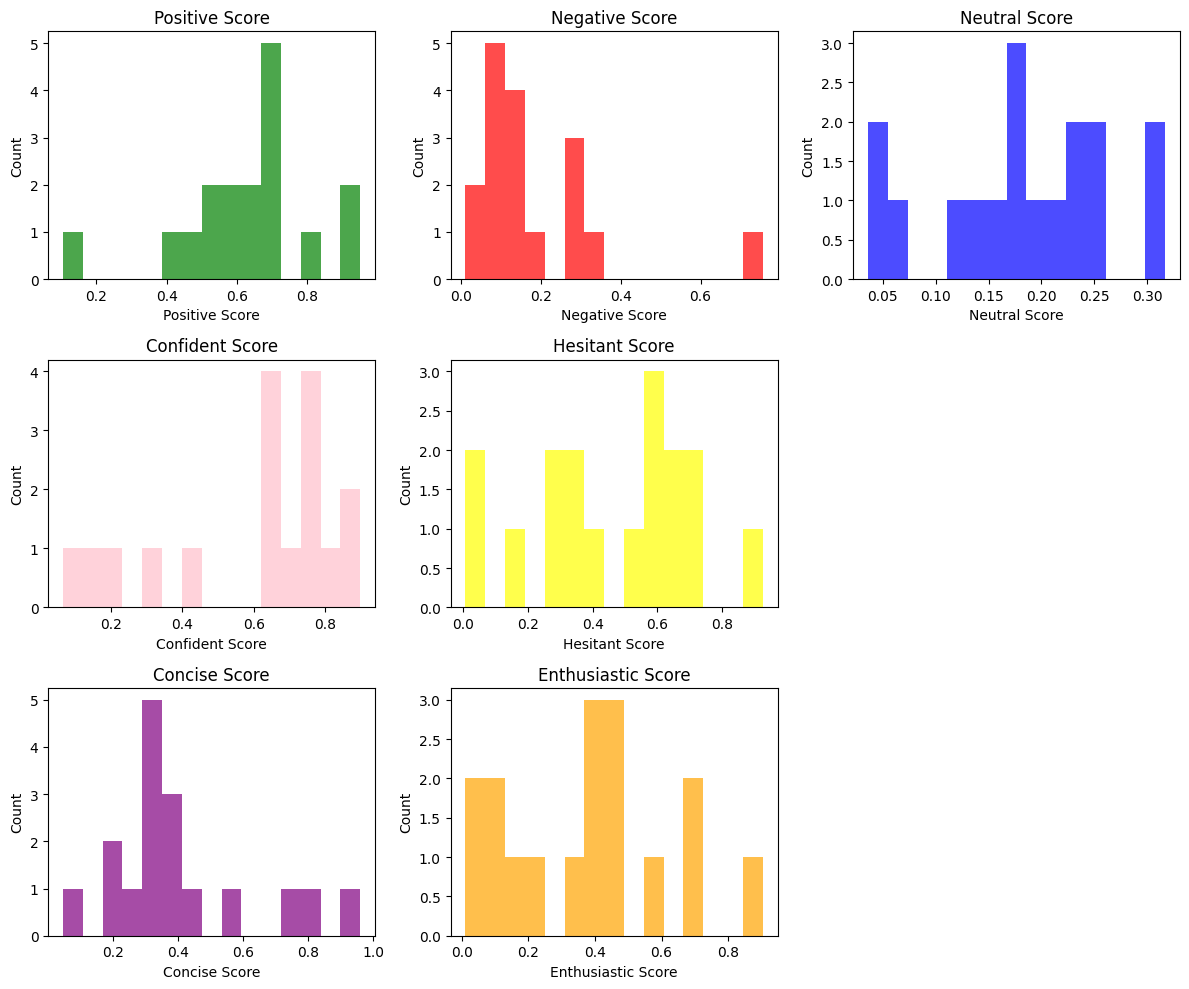

In [20]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

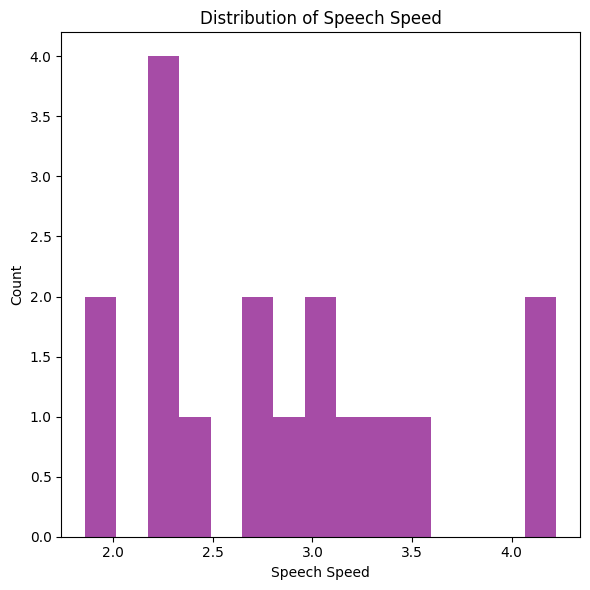

In [21]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

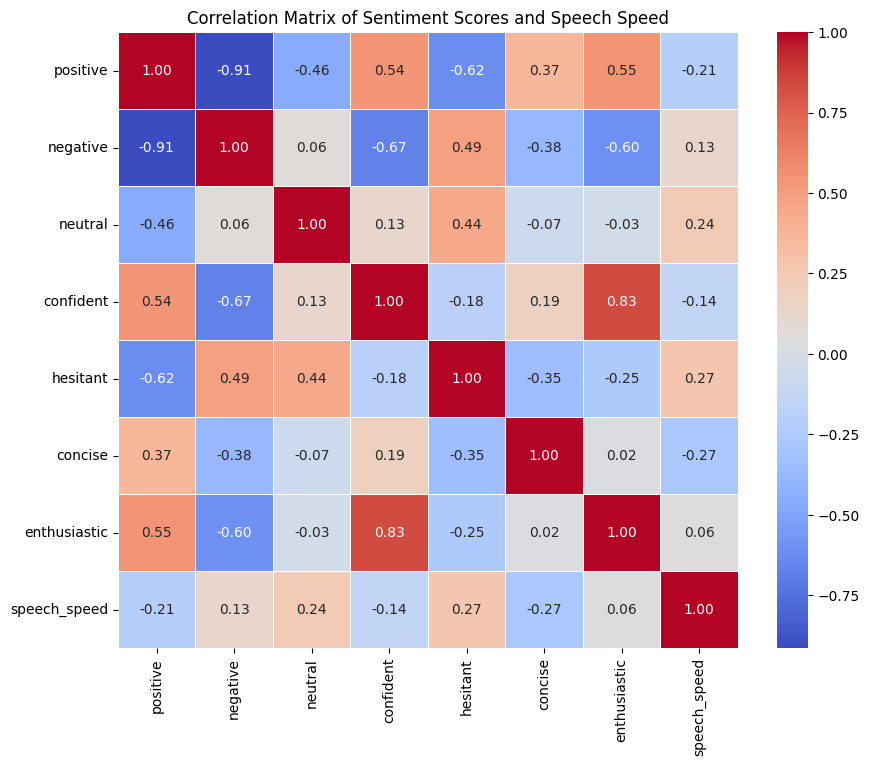

In [22]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

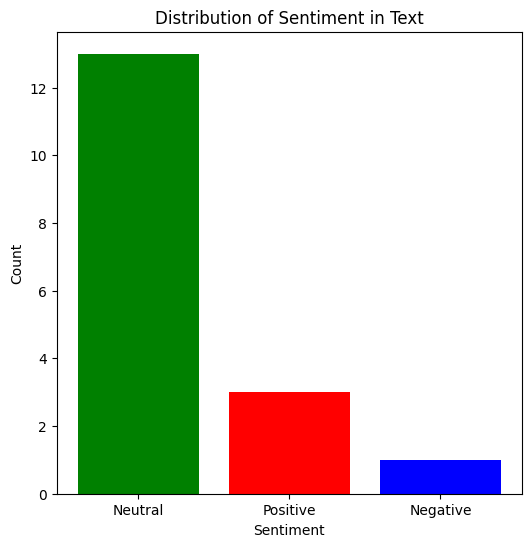

In [23]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [24]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    Hello, I'm Sakshi. I come from Mumbai. I did ...         hesitant
1    with specialization in advertising. I have co...         positive
2    certification courses. One was entrepreneursh...        confident
3    second one was foundations of management by G...         hesitant
4    busy doing college group projects and assignm...        confident
5    various things like drawing, painting, singin...         positive
6    personal movie review account on Instagram. I...        confident
7    international art competition hosted by the l...         positive
8    called Krezkazad. They have over 19 million f...        confident
9    biggest proudest achievements. Because I woul...         positive
10   awareness about mental health issues and neur...         hesitant
11   idea to share with you all. The idea goes as ...         positive
12   and what doesn't work for students with neuro...         negative
13   a

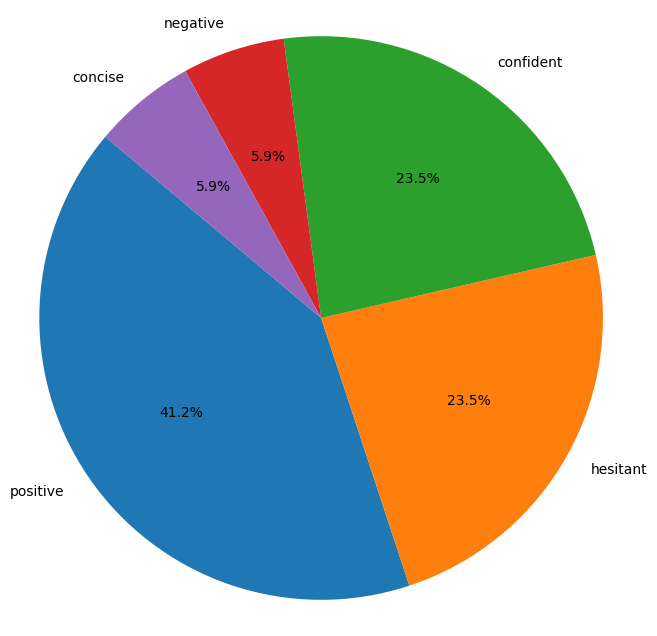

In [25]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [26]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 1.0}

In [30]:
emotion_percentage_dict['disgust']=0
emotion_percentage_dict['happy']=0
emotion_percentage_dict['angry']=0
emotion_percentage_dict['sad']=0
emotion_percentage_dict['surprise']=0
emotion_percentage_dict['fear']=0

In [31]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [44]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 0.0


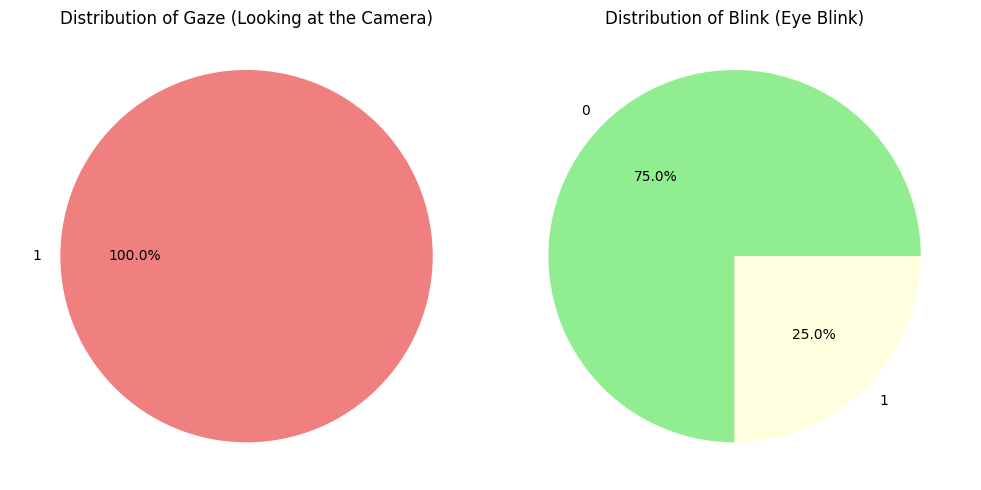

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [34]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [35]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [36]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.5727559722222222

In [37]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'positive': 0.4117647058823529,
 'hesitant': 0.23529411764705882,
 'confident': 0.23529411764705882,
 'negative': 0.058823529411764705,
 'concise': 0.058823529411764705}

In [38]:
sentiment_percentage_dict['enthusiastic']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict

{'positive': 0.4117647058823529,
 'hesitant': 0.23529411764705882,
 'confident': 0.23529411764705882,
 'negative': 0.058823529411764705,
 'concise': 0.058823529411764705,
 'enthusiastic': 0,
 'neutral': 0}

In [39]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [40]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.30323912676707365

In [41]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [42]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.8464260955765297


In [43]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

6.691765773331163